In [ ]:
import cv2
import pandas as pd
import numpy as np
import os
from skimage.feature import greycomatrix
from skimage.feature import greycoprops
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from tqdm import tqdm

In [ ]:
def get_feature(img):

    img_graymatrix = greycomatrix(img, [1], [0, np.pi/2])
#     print("img_graymatrix shape: ",img_graymatrix.shape)

    img_contrast = greycoprops(img_graymatrix, 'contrast')
#     print("img_contrast shape: ", img_contrast.shape)

    img_homogeneity = greycoprops(img_graymatrix, 'homogeneity')
#     print("img_homogeneity shape: ", img_homogeneity.shape)

    img_correlation = greycoprops(img_graymatrix, 'correlation')
#     print("img_correlation shape: ", img_correlation.shape)

    img_dissimilarity = greycoprops(img_graymatrix, 'dissimilarity')
#     print("img_dissimilarity shape: ", img_dissimilarity.shape)

    img_energy = greycoprops(img_graymatrix, 'energy')
#     print("img_energy shape: ", img_energy.shape)


    img_contrast_flattened = img_contrast.flatten()
    img_homogeneity_flattened = img_homogeneity.flatten()
    img_correlation_flattened = img_correlation.flatten()
    img_dissimilarity_flattened = img_dissimilarity.flatten()
    img_energy_flattened = img_energy.flatten()

    features = np.concatenate([img_contrast_flattened, img_homogeneity_flattened,
                             img_correlation_flattened,img_energy_flattened,img_dissimilarity_flattened])
#     print("final_feature shape: ",features.shape)

    return(features)


In [ ]:
def feature_extraction(path_to_folder, class_label):
    data_list=[]
#     count=1
    for file_name in tqdm(os.listdir(path_to_folder)):
#         if(count>1):
#             break
        path_to_img = os.path.join(path_to_folder,file_name)
        img = cv2.imread(path_to_img, 0) # grayscale image

        if np.shape(img) == ():
            continue

        final_feature = get_feature(img)
#         print("final_feature shape: ",final_feature.shape)
#         print("final_feature is: ",final_feature)

        final_feature=list(final_feature)
        final_feature.insert(0,file_name)
        final_feature.insert(1,class_label)

        data_list.append(final_feature)

#         count+=1

    return(data_list)

In [ ]:
from tqdm import tqdm
import cv2
bio = '/content/drive/MyDrive/val/biodegradable'
nonbio= '/content/drive/MyDrive/val/non_biodegradable'

data_list1 = feature_extraction(nonbio, 0)
data_list2 = feature_extraction(bio, 1)

df = pd.DataFrame(data_list1)
df = df.append(pd.DataFrame(data_list2), ignore_index=True)
# #  --------------------------------------------------------------------------------------


df.rename(columns = {0: "image_names", 1: "label"}, inplace = True)

Streaming output truncated to the last 5000 lines.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
 53%|█████▎    | 478/894 [00:40<00:25, 16.26it/s]/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in vers

In [ ]:
df.head(1500)

,image_names,label,2,3,4,5,6,7,8,9,10,11
0,00000009.jpg,0,389.662121,370.856017,0.347854,0.342073,0.959817,0.961767,0.042853,0.041863,9.021855,9.194252
1,00000001.jpg,0,70.395152,48.193507,0.730819,0.736623,0.991034,0.993863,0.641890,0.642774,2.596603,2.254123
2,00000035.jpg,0,49.277210,45.311233,0.626794,0.638778,0.989221,0.990086,0.509939,0.512691,2.954069,2.692220
3,00000050.jpg,0,1513.057258,1390.515401,0.529556,0.503495,0.696177,0.720925,0.069818,0.066069,14.709139,13.855476
4,00000059.jpg,0,15.468083,22.761153,0.757984,0.761255,0.994713,0.992222,0.119913,0.116375,1.185652,1.066942
...,...,...,...,...,...,...,...,...,...,...,...,...
1196,paper589.jpg,1,19.903447,20.183441,0.847160,0.855059,0.987306,0.987138,0.139587,0.139491,0.893143,0.835091
1197,paper542.jpg,1,290.210983,370.378580,0.383095,0.394846,0.948022,0.933692,0.032519,0.034405,8.427929,9.865535
1198,paper559.jpg,1,21.587884,26.670366,0.535145,0.593441,0.978704,0.973687,0.052304,0.057915,1.975961,1.924251
1199,22b28f50-4141-4ca7-be3f-ccb1c521c2df___RS_Earl...,1,415.281587,444.768536,0.150486,0.130043,0.897842,0.890913,0.016135,0.015279,13.142616,13.836336


In [ ]:
df.to_csv('features.csv', index=False)

In [ ]:
data=pd.read_csv('/content/features.csv')

In [ ]:
data

,image_names,label,2,3,4,5,6,7,8,9,10,11
0,00000009.jpg,0,389.662121,370.856017,0.347854,0.342073,0.959817,0.961767,0.042853,0.041863,9.021855,9.194252
1,00000001.jpg,0,70.395152,48.193507,0.730819,0.736623,0.991034,0.993863,0.641890,0.642774,2.596603,2.254123
2,00000035.jpg,0,49.277210,45.311233,0.626794,0.638778,0.989221,0.990086,0.509939,0.512691,2.954069,2.692220
3,00000050.jpg,0,1513.057258,1390.515401,0.529556,0.503495,0.696177,0.720925,0.069818,0.066069,14.709139,13.855476
4,00000059.jpg,0,15.468083,22.761153,0.757984,0.761255,0.994713,0.992222,0.119913,0.116375,1.185652,1.066942
...,...,...,...,...,...,...,...,...,...,...,...,...
1196,paper589.jpg,1,19.903447,20.183441,0.847160,0.855059,0.987306,0.987138,0.139587,0.139491,0.893143,0.835091
1197,paper542.jpg,1,290.210983,370.378580,0.383095,0.394846,0.948022,0.933692,0.032519,0.034405,8.427929,9.865535
1198,paper559.jpg,1,21.587884,26.670366,0.535145,0.593441,0.978704,0.973687,0.052304,0.057915,1.975961,1.924251
1199,22b28f50-4141-4ca7-be3f-ccb1c521c2df___RS_Earl...,1,415.281587,444.768536,0.150486,0.130043,0.897842,0.890913,0.016135,0.015279,13.142616,13.836336


In [ ]:
data.columns

Index(['image_names', 'label', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image_names  1201 non-null   object 
 1   label        1201 non-null   int64  
 2   2            1201 non-null   float64
 3   3            1201 non-null   float64
 4   4            1201 non-null   float64
 5   5            1201 non-null   float64
 6   6            1201 non-null   float64
 7   7            1201 non-null   float64
 8   8            1201 non-null   float64
 9   9            1201 non-null   float64
 10  10           1201 non-null   float64
 11  11           1201 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 112.7+ KB


In [ ]:
data.dtypes

image_names     object
label            int64
2              float64
3              float64
4              float64
5              float64
6              float64
7              float64
8              float64
9              float64
10             float64
11             float64
dtype: object

In [ ]:
data['image_names'] = data['image_names'].astype('object')
data['image_names'] = data['image_names'].str.strip()
data['image_names'] =data['image_names'].astype('category')
data['image_names'] = data['image_names'].cat.codes
data['image_names'] = data['image_names'].astype(np.int32)

In [ ]:
X = data.drop(['label'], axis=1)
y = data['label']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:

# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)


In [ ]:
# fit the model

rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [ ]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



In [ ]:
accuracy_rfc =accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of rfc: ',accuracy_rfc )

Model accuracy score of rfc:  0.8639798488664987


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_rfc)

Confusion matrix

 [[ 70  31]
 [ 23 273]]


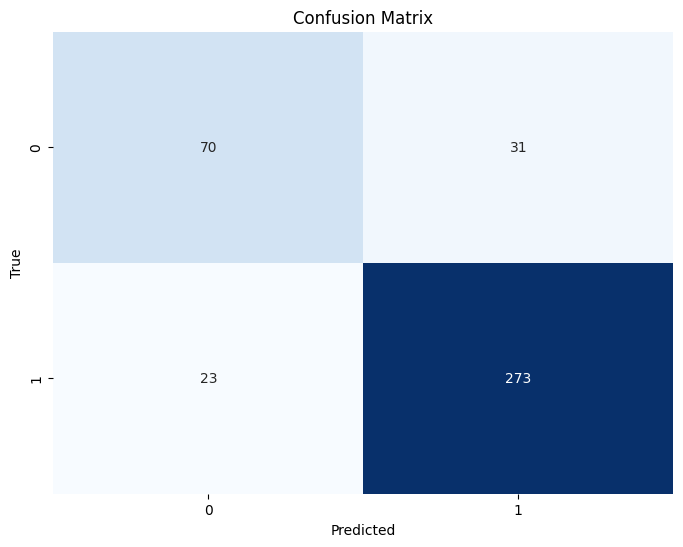

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       101
           1       0.90      0.92      0.91       296

    accuracy                           0.86       397
   macro avg       0.83      0.81      0.82       397
weighted avg       0.86      0.86      0.86       397



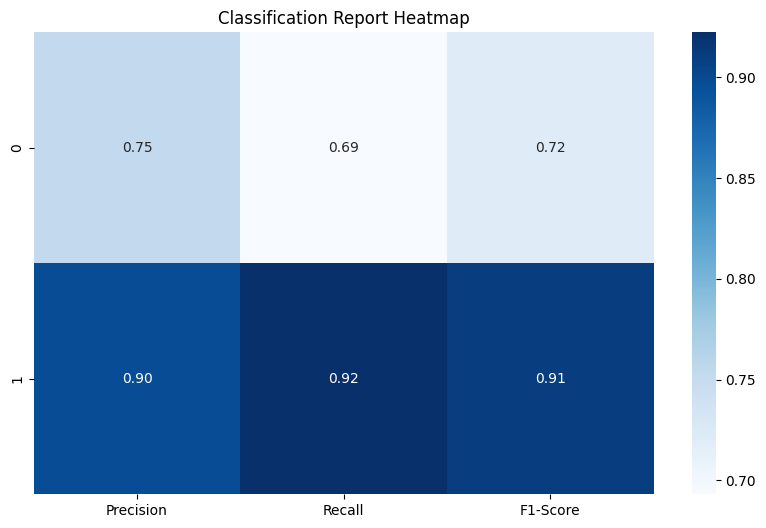

In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

AUC: 0.81


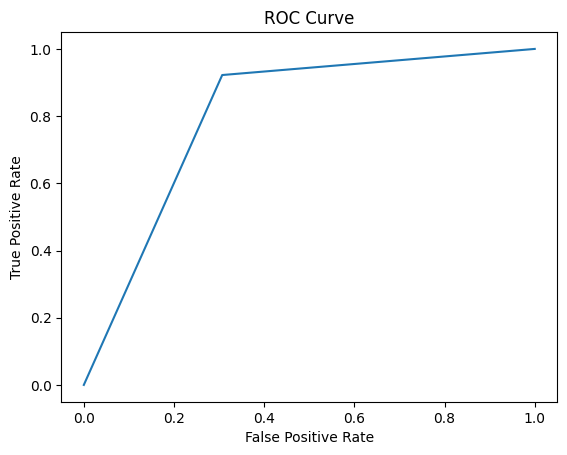

In [ ]:
# Calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

SVM

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters
svc=SVC()




In [ ]:
# fit classifier to training set
svc.fit(X_train,y_train)


SVC()

In [ ]:


# make predictions on test set
y_pred=svc.predict(X_test)

In [ ]:
accuracy_svc=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of svc: ',accuracy_svc)

Model accuracy score of svc:  0.760705289672544


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_svc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_svc)

Confusion matrix

 [[ 35  66]
 [ 29 267]]


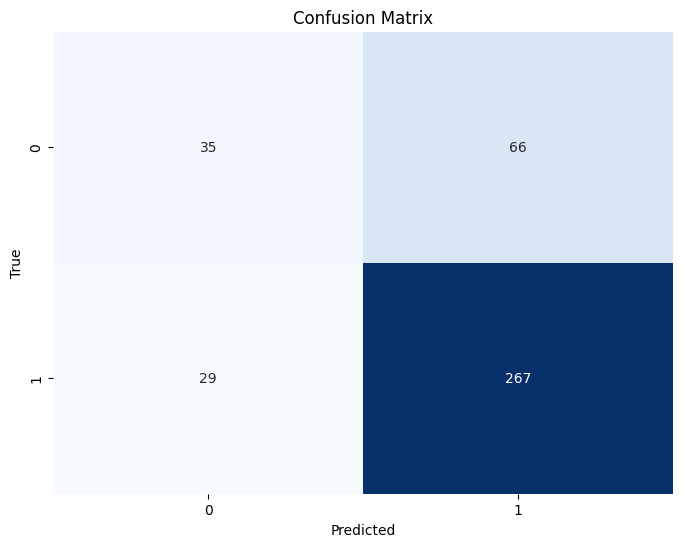

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.35      0.42       101
           1       0.80      0.90      0.85       296

    accuracy                           0.76       397
   macro avg       0.67      0.62      0.64       397
weighted avg       0.74      0.76      0.74       397



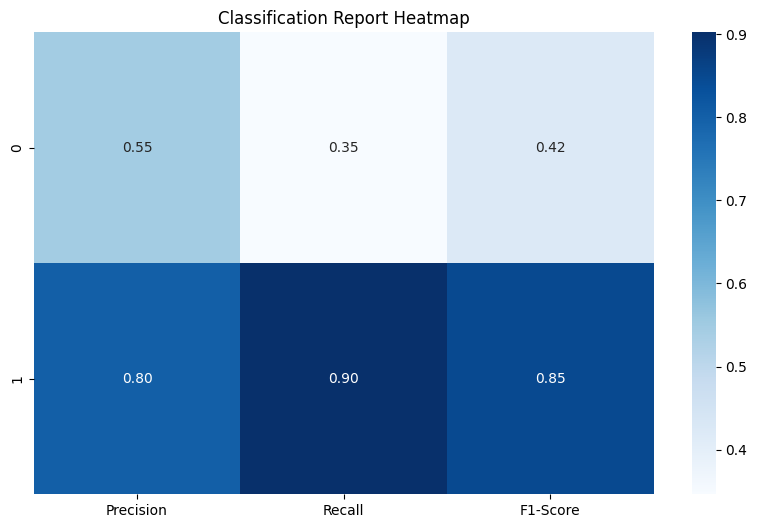

In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

AUC: 0.62


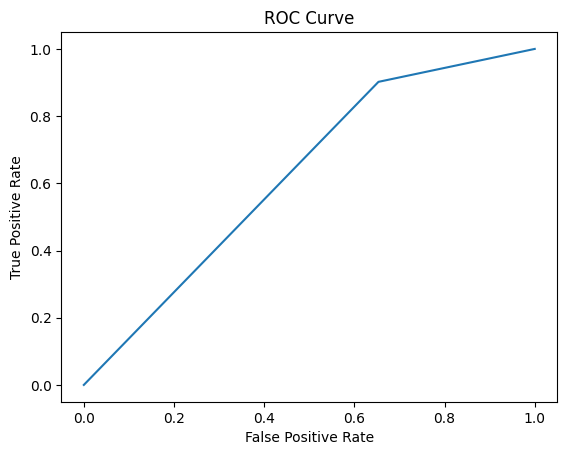

In [ ]:
# Calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()